# Predict deaths

In [14]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
warnings.filterwarnings('ignore')

In [3]:
#import data
url="https://github.com/Themaoyc/MDA/blob/main/Data/deaths_predict.csv?raw=true"
df = pd.read_csv(url)
df.head()

,Year,Country,ISO,Total Deaths,CPI,GDP(million dollars),Population,healthexp,tmax,Associated Drought,Associated Wildfire,Appeal or Declaration,duration
0,2000,Bulgaria,BGR,7,63.549547,28124.88,8170172,94.497452,34.6,0,0,0,31
1,2000,Cyprus,CYP,5,63.549547,10594.98,943288,750.516724,34.1,0,0,0,1
2,2000,Greece,GRC,27,63.549547,141247.28,10805808,885.410400,33.8,0,0,0,1
3,2000,Turkey,TUR,11,63.549547,171494.21,63240196,199.499374,27.6,1,0,0,31
4,2000,Romania,ROU,6,63.549547,80873.10,22442971,69.893456,26.5,0,0,0,1


## Data Exporation 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   109 non-null    int64  
 1   Country                109 non-null    object 
 2   ISO                    109 non-null    object 
 3   Total Deaths           109 non-null    int64  
 4   CPI                    109 non-null    float64
 5   GDP(million dollars)   109 non-null    float64
 6   Population             109 non-null    int64  
 7   healthexp              109 non-null    float64
 8   tmax                   109 non-null    float64
 9   Associated Drought     109 non-null    int64  
 10  Associated Wildfire    109 non-null    int64  
 11  Appeal or Declaration  109 non-null    int64  
 12  duration               109 non-null    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 11.2+ KB


In [5]:
df.describe()

,Year,Total Deaths,CPI,GDP(million dollars),Population,healthexp,tmax,Associated Drought,Associated Wildfire,Appeal or Declaration,duration
count,109.000000,109.000000,109.000000,1.090000e+02,1.090000e+02,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,2009.385321,1350.532110,79.125043,8.817692e+07,2.345091e+08,2502.721023,28.881529,0.110092,0.055046,0.027523,19.477064
std,6.174782,6117.980654,10.015751,1.815401e+08,4.105371e+08,2159.701873,5.027452,0.314450,0.229123,0.164357,41.493774
min,2000.000000,1.000000,63.549547,1.059498e+04,4.516300e+05,10.275986,8.100000,0.000000,0.000000,0.000000,-9.000000
25%,2004.000000,14.000000,69.706442,4.782389e+05,1.622530e+07,199.499374,26.400000,0.000000,0.000000,0.000000,1.000000
50%,2007.000000,56.000000,76.518679,2.255283e+06,6.412827e+07,2740.269287,29.100000,0.000000,0.000000,0.000000,7.000000
75%,2015.000000,338.000000,87.469932,3.495820e+07,1.428495e+08,4291.489746,29.235238,0.000000,0.000000,0.000000,31.000000
max,2019.000000,55736.000000,94.349092,5.584912e+08,1.366418e+09,8342.580078,41.800000,1.000000,1.000000,1.000000,377.000000


<AxesSubplot:>

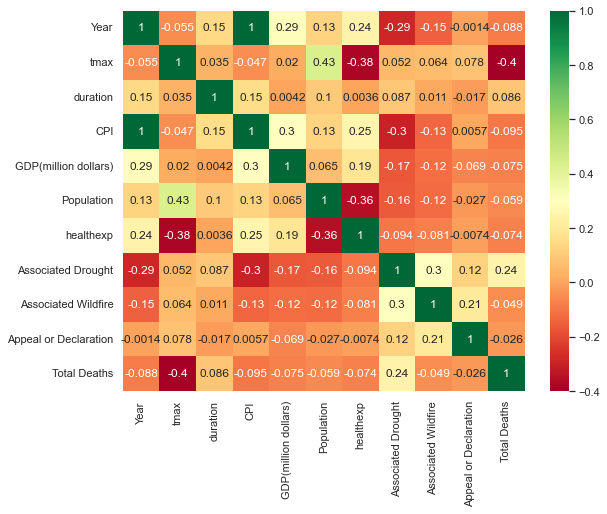

In [6]:
sns.set(rc = {'figure.figsize':(9,7)})
sns.heatmap(df[['Year','tmax','duration','CPI','GDP(million dollars)','Population','healthexp','Associated Drought',
                   'Associated Wildfire','Appeal or Declaration','Total Deaths']].corr(),cmap='RdYlGn',annot=True)

The correlation of Year and CPI is 1, so we drop the column CPI.

In [7]:
df.drop(['CPI'], axis=1,inplace=True)

In [8]:
x = df[['Year','GDP(million dollars)','Population','healthexp','tmax','Associated Drought','Associated Wildfire',
        'Appeal or Declaration','duration']]
y = df[['Total Deaths']]
x.head()

,Year,GDP(million dollars),Population,healthexp,tmax,Associated Drought,Associated Wildfire,Appeal or Declaration,duration
0,2000,28124.88,8170172,94.497452,34.6,0,0,0,31
1,2000,10594.98,943288,750.516724,34.1,0,0,0,1
2,2000,141247.28,10805808,885.410400,33.8,0,0,0,1
3,2000,171494.21,63240196,199.499374,27.6,1,0,0,31
4,2000,80873.10,22442971,69.893456,26.5,0,0,0,1


## Change the scale of several variables

In [9]:
x['Yearnew']=x['Year']-1999
x['GDP(e+12 dollars)']=x['GDP(million dollars)']/1000000
x['Population(e+07)']=x['Population']/10000000
x['healthexp(e+07 dollars)']=x['healthexp']/10
x.drop(['Year','GDP(million dollars)','Population','healthexp'],axis=1,inplace=True)
x.head()

,tmax,Associated Drought,Associated Wildfire,Appeal or Declaration,duration,Yearnew,GDP(e+12 dollars),Population(e+07),healthexp(e+07 dollars)
0,34.6,0,0,0,31,1,0.028125,0.817017,9.449745
1,34.1,0,0,0,1,1,0.010595,0.094329,75.051672
2,33.8,0,0,0,1,1,0.141247,1.080581,88.541040
3,27.6,1,0,0,31,1,0.171494,6.324020,19.949937
4,26.5,0,0,0,1,1,0.080873,2.244297,6.989346


## Split test and train dataset

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=888,test_size=0.2, shuffle=True)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(87, 9)
(87, 1)
(22, 9)
(22, 1)


## Poisson regression 
Poisson regression is used to predict a dependent variable that consists of "count data" given one or more independent variables. Here we can regard the total deaths as the count of deaths.

In [11]:
pmodel = sm.GLM(y_train,x_train,family=sm.families.Poisson())
results = pmodel.fit()
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           Total Deaths   No. Observations:                   87
Model:                            GLM   Df Residuals:                       78
Model Family:                 Poisson   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -4.0070e+05
Date:                Mon, 08 Aug 2022   Deviance:                   8.0087e+05
Time:                        21:58:58   Pearson chi2:                 3.80e+13
No. Iterations:                    21   Pseudo R-squ. (CS):               -inf
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
tmax                      

Note that the Log-Likelihood here is far smaller than 0, which means the Likelihood is very closed to 0. And this is why the Pseudo R-squ. (CS)=-inf.

## Diagnosis 

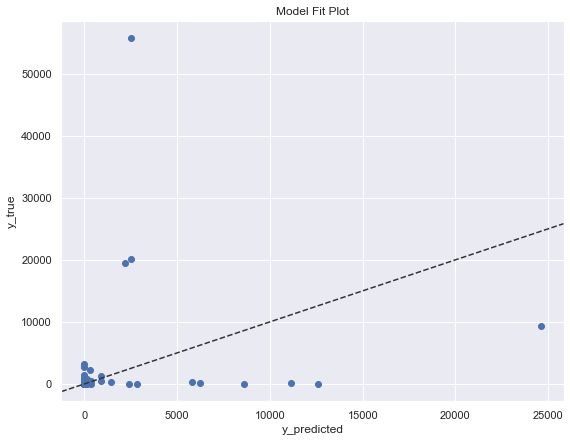

In [12]:
predict_1 = results.predict()
plt.scatter(predict_1, y_train)
plt.axline([0,0],slope=1,c=".2", ls="--")
plt.title('Model Fit Plot')
plt.xlabel('y_predicted')
plt.ylabel('y_true')
plt.show()

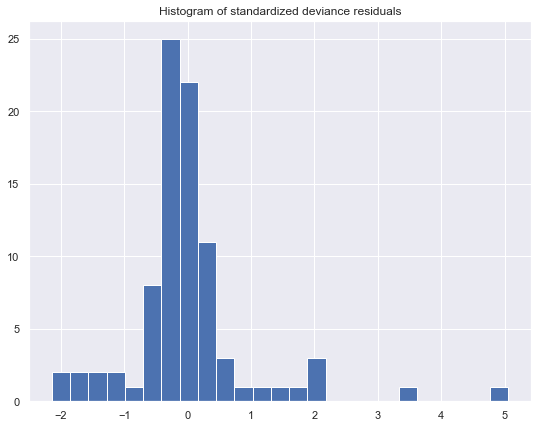

In [15]:
fig, ax = plt.subplots()
resid = results.resid_deviance.copy()
resid_std = stats.zscore(resid)
ax.hist(resid_std, bins=25)
ax.set_title('Histogram of standardized deviance residuals');

Clearly, we can see some extreme outliers

In [16]:
a=pd.DataFrame(abs(resid_std),columns=['ABS SDR'])
outliers=a.loc[a['ABS SDR']>=2]
outliers

,ABS SDR
64,5.060187
28,3.431297
104,2.144440
35,2.062462
16,2.118781
17,2.078739


In [17]:
x_train_new=x_train.drop(index=[16,17,28,35,64,104])
y_train_new=y_train.drop(index=[16,17,28,35,64,104])
print(x_train_new.shape)
print(y_train_new.shape)

(81, 9)
(81, 1)


In [18]:
#refit the model
pmodel2 = sm.GLM(y_train_new,x_train_new,family=sm.families.Poisson())
results2 = pmodel2.fit()
print(results2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           Total Deaths   No. Observations:                   81
Model:                            GLM   Df Residuals:                       72
Model Family:                 Poisson   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -30600.
Date:                Mon, 08 Aug 2022   Deviance:                       60736.
Time:                        21:59:35   Pearson chi2:                 4.80e+05
No. Iterations:                     8   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
tmax                      

We can see that the coefficient has changed a lot. The Log-Likelihood is much larger, and the Pseudo R-squ. (CS) now is quite close to 1.

##  Overdispersion
In a poisson model we assume that the mean is equal to variance, and this is often not the case in practice.

In [19]:
print('mean:',np.mean(y_train_new))
print('variance:',np.var(y_train_new))

mean: Total Deaths    320.222222
dtype: float64
variance: Total Deaths    1.244078e+06
dtype: float64


Here variance is much larger than the mean. We choose a negative binomial model to fix it.

##  Negative binomial model

In [20]:
pmodel3 = sm.GLM(y_train_new,x_train_new,family=sm.families.NegativeBinomial())
results3 = pmodel3.fit()
print(results3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           Total Deaths   No. Observations:                   81
Model:                            GLM   Df Residuals:                       72
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -521.32
Date:                Mon, 08 Aug 2022   Deviance:                       247.25
Time:                        21:59:40   Pearson chi2:                     355.
No. Iterations:                    42   Pseudo R-squ. (CS):             0.4878
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
tmax                      

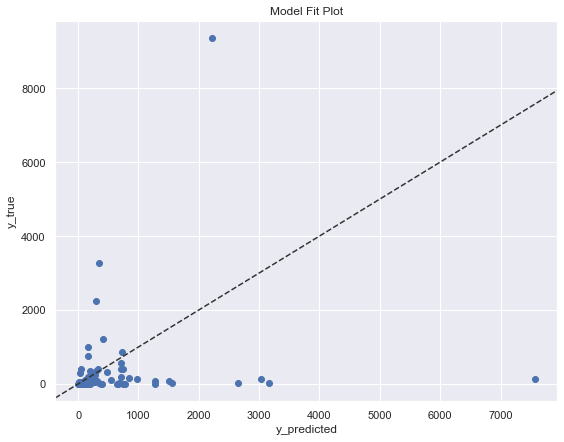

In [21]:
predict_3 = results3.predict()
plt.scatter(predict_3, y_train_new)
plt.axline([0,0],slope=1,c=".2", ls="--")
plt.title('Model Fit Plot')
plt.xlabel('y_predicted')
plt.ylabel('y_true')
plt.show()

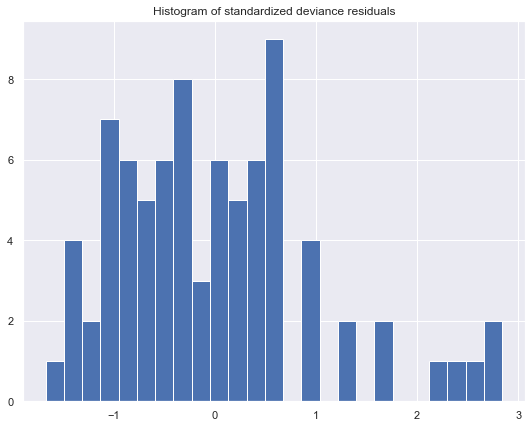

In [22]:
fig, ax = plt.subplots()
resid3 = results3.resid_deviance.copy()
resid_std3 = stats.zscore(resid3)
ax.hist(resid_std3, bins=25)
ax.set_title('Histogram of standardized deviance residuals');

Negative binomia model has a much better performance than the poisson model: the Log-Likelihood is even closer to zero, and the residual plot also has a better shape.

## Validate with the test group

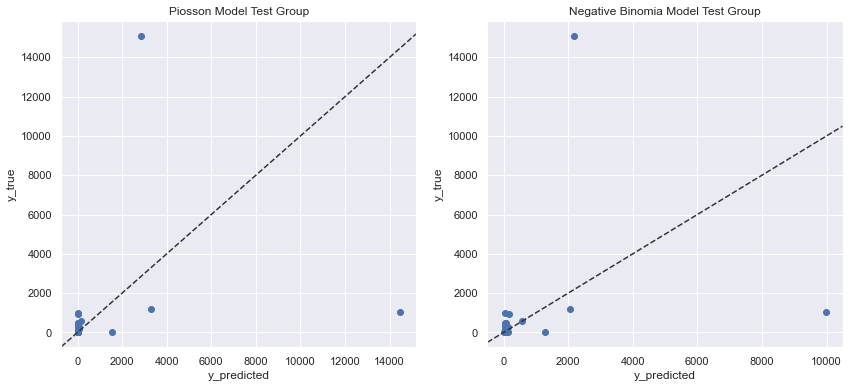

In [23]:
fig = plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
predict_2 = results2.predict(x_test)
plt.scatter(predict_2,y_test)
plt.axline([0,0],slope=1,c=".2", ls="--")
plt.title('Piosson Model Test Group')
plt.xlabel('y_predicted')
plt.ylabel('y_true')
plt.subplot(1,2,2)
predict_3 = results3.predict(x_test)
plt.scatter(predict_3,y_test)
plt.axline([0,0],slope=1,c=".2", ls="--")
plt.title('Negative Binomia Model Test Group')
plt.xlabel('y_predicted')
plt.ylabel('y_true')
plt.show()

In [24]:
resp=y_test.values.ravel()-predict_2
resn=y_test.values.ravel()-predict_3
c=resp*resn
d=resn*resn
MSEP=np.mean(c)
MSEN=np.mean(d)
print('MSEPoisson:',round(MSEP))
print('Negative binomial:',round(MSEN))

MSEPoisson: 12920244
Negative binomial: 11419829


The negative binomial model also has a smaller MSE, so we choose this model to predict heatwaves in the future. Note that this model still work bad with some extreme situations, one reason may be that the records are incorrect. But if the dataset does not make any mistakes, that suggests that we still need some more useful variables to predict the total deaths. More research should be made and more data should be collected. To fight with the heatwave, we still have a long way to go.

In [ ]:
#The dataset for visualization
#app1=pd.merge(x_train_new,y_train_new,left_index=True,right_index=True)
#app1.to_csv('app1.csv')